In [1]:
library(nlme)
library(multcomp)
options(jupyter.plot_mimetypes = "image/png")
library(ggplot2)
library(corrplot)
library(gridExtra)
library(grid)
library(data.table)
library(effects)
library(xtable)

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



## Load Data

In [2]:
data = read.csv("../data_meta_analysis/Data_Classifications_v7.csv")

data<-data[c('PID','Info.type','Accuracy.50','Significance','Roi.Search',
             'Pattern.type','Classifier.type','Scanner','Smoothing','Coregistration','Pattern.normalization.type','Num_subs')]

factors<-c('Info.type','Significance','Roi.Search',
             'Pattern.type','Classifier.type','Scanner','Smoothing','Coregistration','Pattern.normalization.type','Num_subs')

for (pid in unique(data$PID)){
    #print('--')
    #print(pid)
    #print(nrow(data1[data1$PID==pid,]))
    #print('--')
    data[data$PID==pid,'n_per_study']=nrow(data[data$PID==pid,])
}


# msc

R1 = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_before_clustering_2.csv"))
#R2 = read.csv(paste("X_region1_after_clustering.csv"))
R3 = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_after_clustering_lr_2.csv"))
R4 = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_after_clustering2_2.csv"))


R1names = colnames(R1)
#R2names = colnames(R2)
R3names = colnames(R3)
R4names = colnames(R4)

i=1
for (name in R3names){
    R3names[i]<-paste(sep='','R3',name)
    i=i+1
}
R3names
colnames(R3)<-R3names
head(R3)

i=1
for (name in R4names){
    R4names[i]<-paste(sep='','R4',name)
    i=i+1
}
R4names
colnames(R4)<-R4names
head(R4)

Warning message:
In file(file, "rt"): cannot open file '../Data/Data_Classifications_v7.csv': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


ERROR: Error in data[c("PID", "Info.type", "Accuracy.50", "Significance", "Roi.Search", : object of type 'closure' is not subsettable


ERROR: Error in data$PID: object of type 'closure' is not subsettable


Warning message:
In file(file, "rt"): cannot open file 'X_region1_before_clustering_2.csv': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


Warning message:
In file(file, "rt"): cannot open file 'X_region1_after_clustering_lr_2.csv': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


Warning message:
In file(file, "rt"): cannot open file 'X_region1_after_clustering2_2.csv': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


ERROR: Error in is.data.frame(x): object 'R1' not found


ERROR: Error in is.data.frame(x): object 'R3' not found


ERROR: Error in is.data.frame(x): object 'R4' not found


ERROR: Error in eval(expr, envir, enclos): object 'R3names' not found


ERROR: Error in eval(expr, envir, enclos): object 'R3names' not found


ERROR: Error in eval(expr, envir, enclos): object 'R3names' not found


ERROR: Error in head(R3): object 'R3' not found


ERROR: Error in eval(expr, envir, enclos): object 'R4names' not found


ERROR: Error in eval(expr, envir, enclos): object 'R4names' not found


ERROR: Error in eval(expr, envir, enclos): object 'R4names' not found


ERROR: Error in head(R4): object 'R4' not found


In [7]:
unique(data$Pattern.normalization.type)

[1] None                  Normalized Spatially  Normalized Temporally
Levels: None Normalized Spatially Normalized Temporally

In [3]:
data = cbind(data,R3,R4) # will bind with other region names too 


# mscl fixed 
data<-data[!data$Classifier.type=='neural-net',] # no observations but still has a level
data[data$Scanner=='4T','Scanner']='3T' # only one observatoin with 3T

data$PID<-as.factor(data$PID)
data$Info.type<-as.factor(data$Info.type)
data$Smoothing<-as.factor(data$Smoothing)
data$Roi.Search<-as.factor(data$Roi.Search)
data$Classifier.type<-as.factor(data$Classifier.type)
data$Coregistration<-as.factor(data$Coregistration)
data$Pattern.type<-as.factor(data$Pattern.type)

#data[data$Pattern.normalization.type=='Normalized Spatially']

data$Pattern.normalization.type<-as.factor(data$Pattern.normalization.type)

data<-droplevels(data)

data_50<-subset(data,!is.na(Accuracy.50))

data_50_non<-subset(data,!is.na(Accuracy.50)& Significance==0)

data_50_sig<-subset(data,!is.na(Accuracy.50) & Significance==1)
head(data_50_sig)
nrow(data_50_sig)


# make unique
keys <- colnames(data_50_sig)[!grepl('Accuracy.50',colnames(data_50_sig))] # grab everything but accuracy
X <- as.data.table(data_50_sig)
data_50_sig_unique<- X[,list(Accuracy.50.mean= mean(Accuracy.50)),keys] # average the non-unique
data_50_sig_unique$Accuracy.50<-data_50_sig_unique$Accuracy.50.mean
data_50_sig_unique<-data.frame(data_50_sig_unique)

keys <- colnames(data_50)[!grepl('Accuracy.50',colnames(data_50))] # grab everything but accuracy
X <- as.data.table(data_50)
data_50_unique<- X[,list(Accuracy.50.mean= mean(Accuracy.50)),keys] # average the non-unique
data_50_unique$Accuracy.50<-data_50_unique$Accuracy.50.mean
data_50_unique<-data.frame(data_50_unique)



nrow(data_50_sig_unique)
nrow(data_50_unique)

ERROR: Error in cbind(data, R3, R4): object 'R3' not found


ERROR: Error in data$Classifier.type: object of type 'closure' is not subsettable


ERROR: Error in data$Scanner: object of type 'closure' is not subsettable


ERROR: Error in data$PID: object of type 'closure' is not subsettable


ERROR: Error in data$Info.type: object of type 'closure' is not subsettable


ERROR: Error in data$Smoothing: object of type 'closure' is not subsettable


ERROR: Error in data$Roi.Search: object of type 'closure' is not subsettable


ERROR: Error in data$Classifier.type: object of type 'closure' is not subsettable


ERROR: Error in data$Coregistration: object of type 'closure' is not subsettable


ERROR: Error in data$Pattern.type: object of type 'closure' is not subsettable


ERROR: Error in data$Pattern.normalization.type: object of type 'closure' is not subsettable


ERROR: Error in UseMethod("droplevels"): no applicable method for 'droplevels' applied to an object of class "function"


ERROR: Error in subset.default(data, !is.na(Accuracy.50)): object 'Accuracy.50' not found


ERROR: Error in subset.default(data, !is.na(Accuracy.50) & Significance == 0): object 'Accuracy.50' not found


ERROR: Error in subset.default(data, !is.na(Accuracy.50) & Significance == 1): object 'Accuracy.50' not found


ERROR: Error in head(data_50_sig): object 'data_50_sig' not found


ERROR: Error in nrow(data_50_sig): object 'data_50_sig' not found


ERROR: Error in is.data.frame(x): object 'data_50_sig' not found


ERROR: Error in as.data.table(data_50_sig): object 'data_50_sig' not found


ERROR: Error in eval(expr, envir, enclos): object 'X' not found


ERROR: Error in eval(expr, envir, enclos): object 'data_50_sig_unique' not found


ERROR: Error in data.frame(data_50_sig_unique): object 'data_50_sig_unique' not found


ERROR: Error in is.data.frame(x): object 'data_50' not found


ERROR: Error in as.data.table(data_50): object 'data_50' not found


ERROR: Error in eval(expr, envir, enclos): object 'X' not found


ERROR: Error in eval(expr, envir, enclos): object 'data_50_unique' not found


ERROR: Error in data.frame(data_50_unique): object 'data_50_unique' not found


ERROR: Error in nrow(data_50_sig_unique): object 'data_50_sig_unique' not found


ERROR: Error in nrow(data_50_unique): object 'data_50_unique' not found


## Basic Plots 

### Factor Plots 

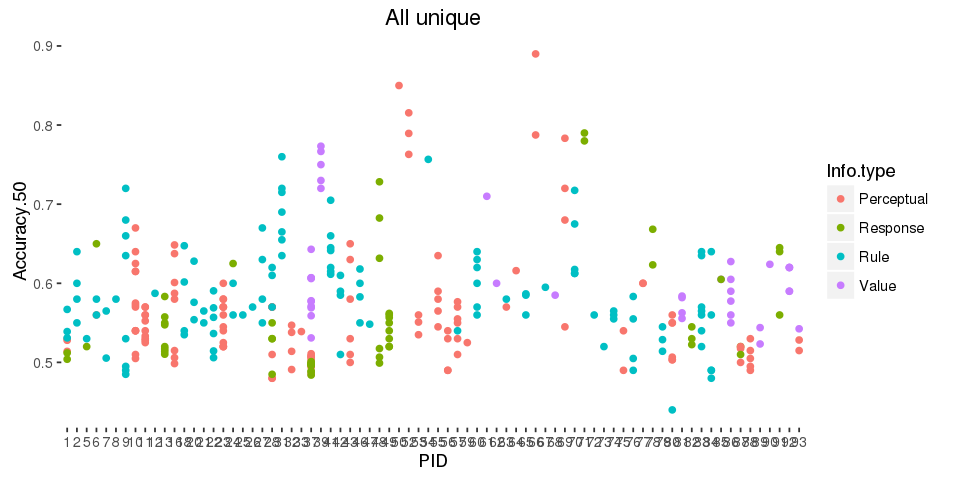

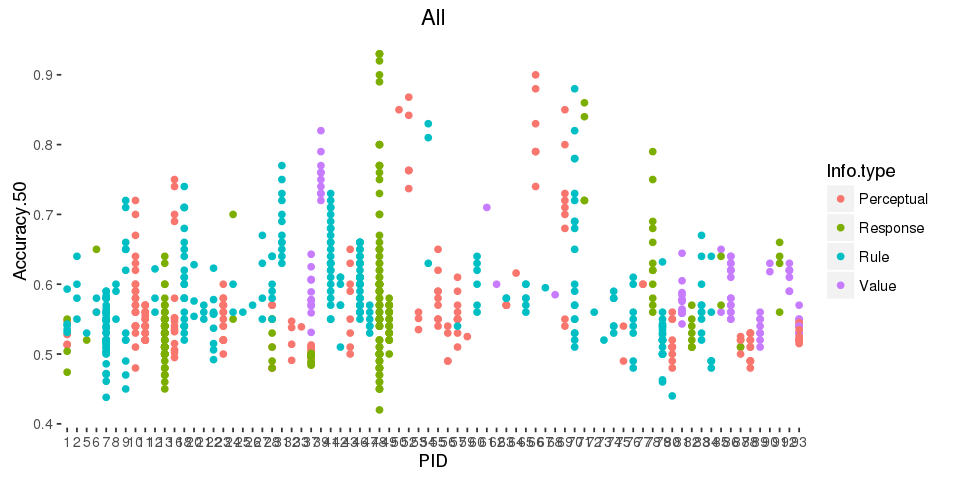

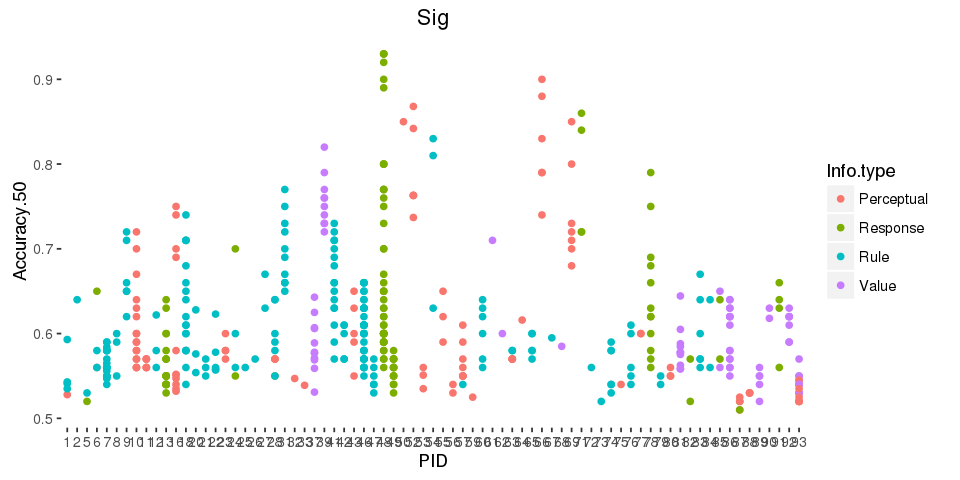

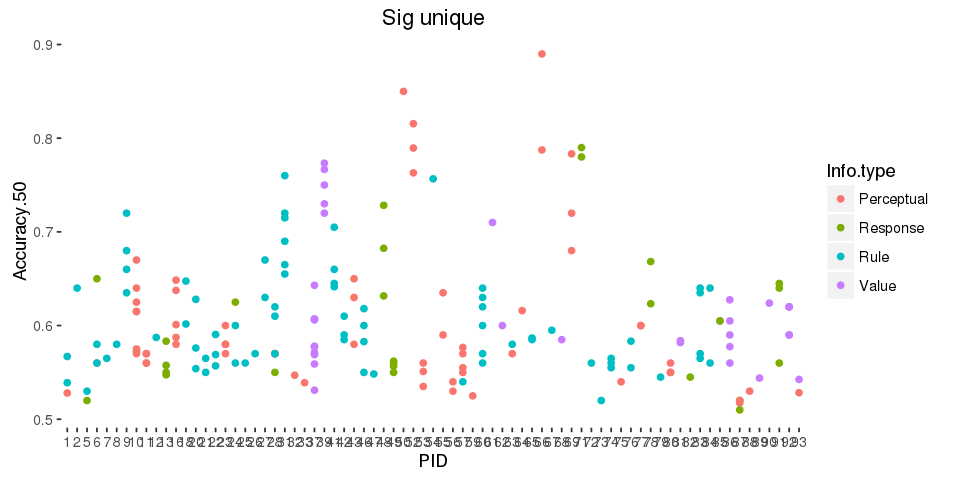

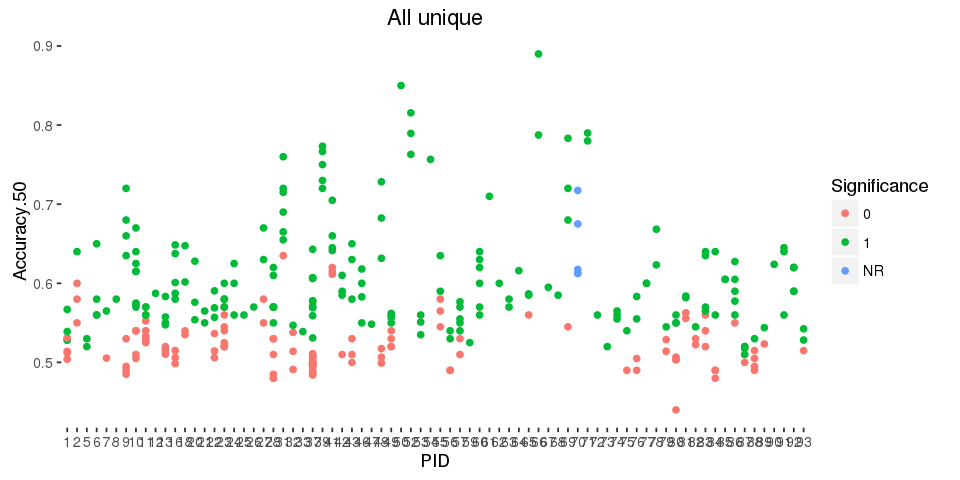

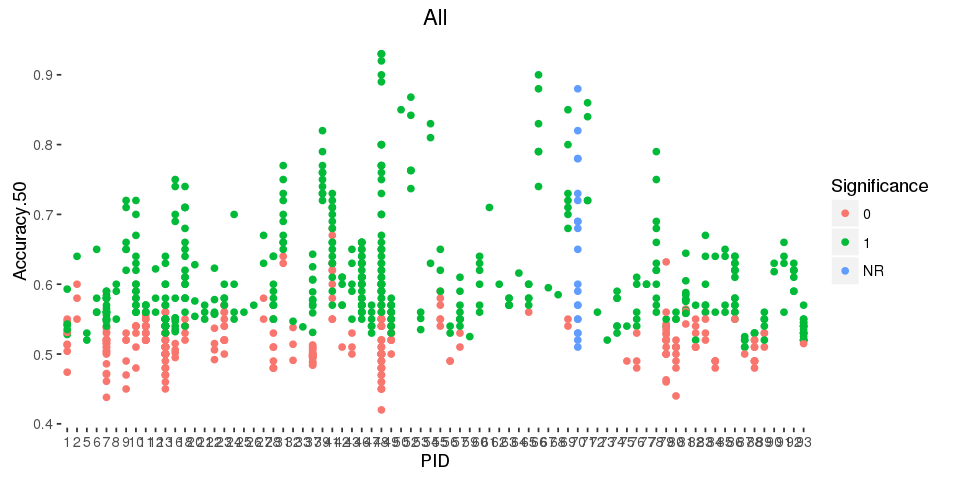

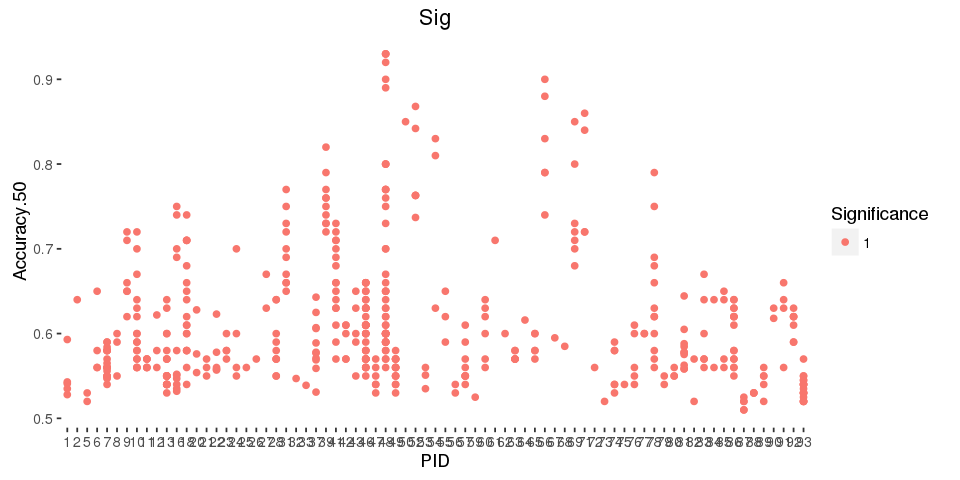

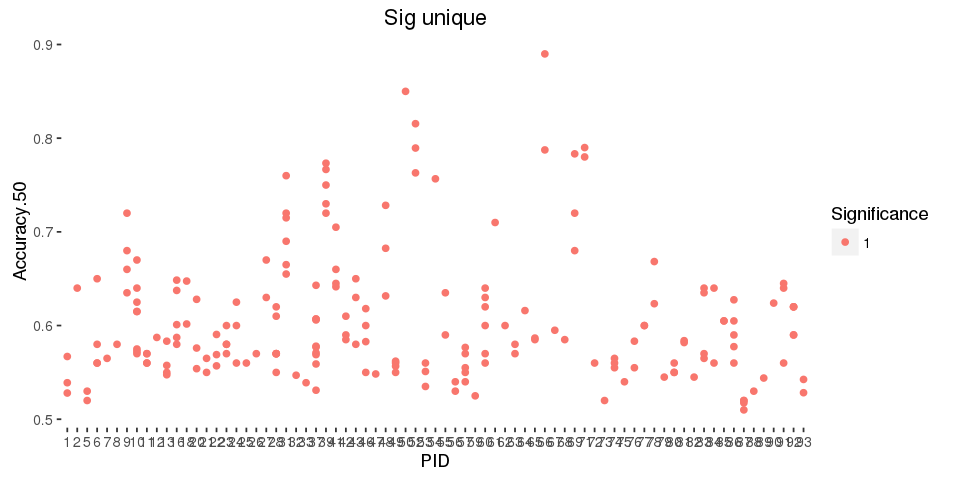

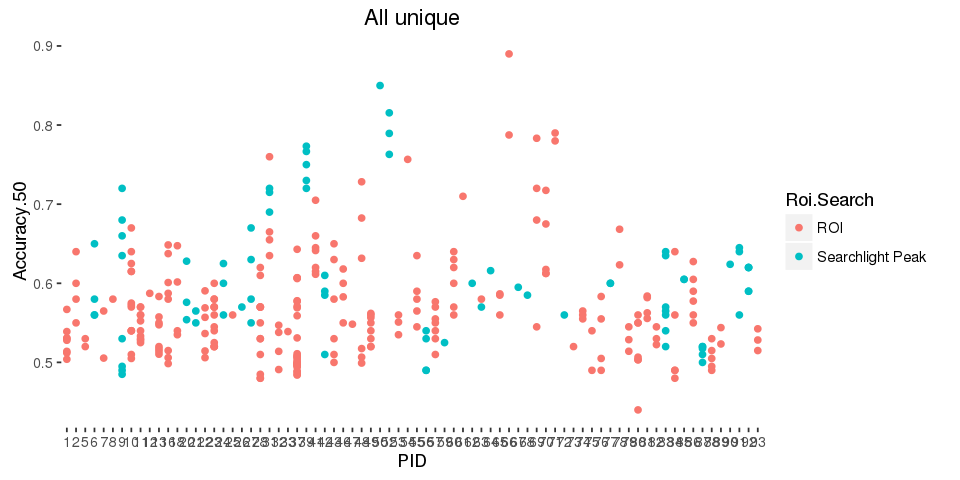

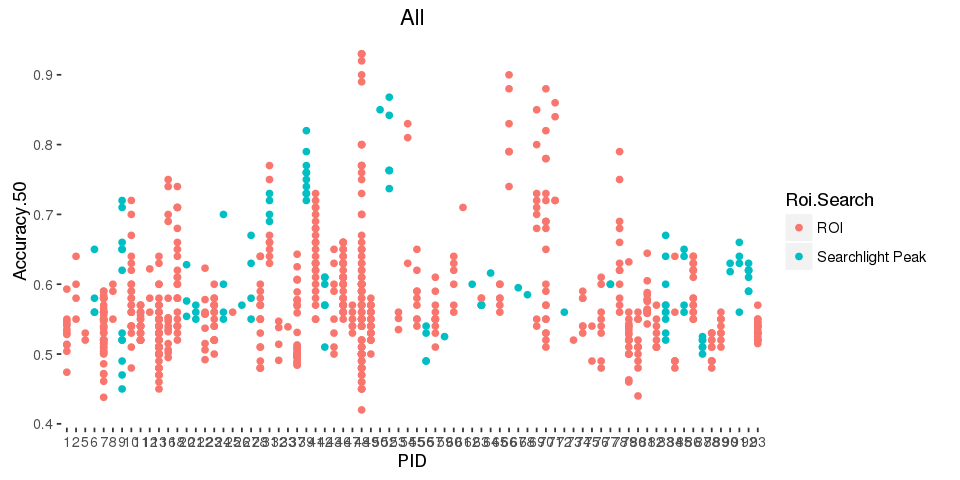

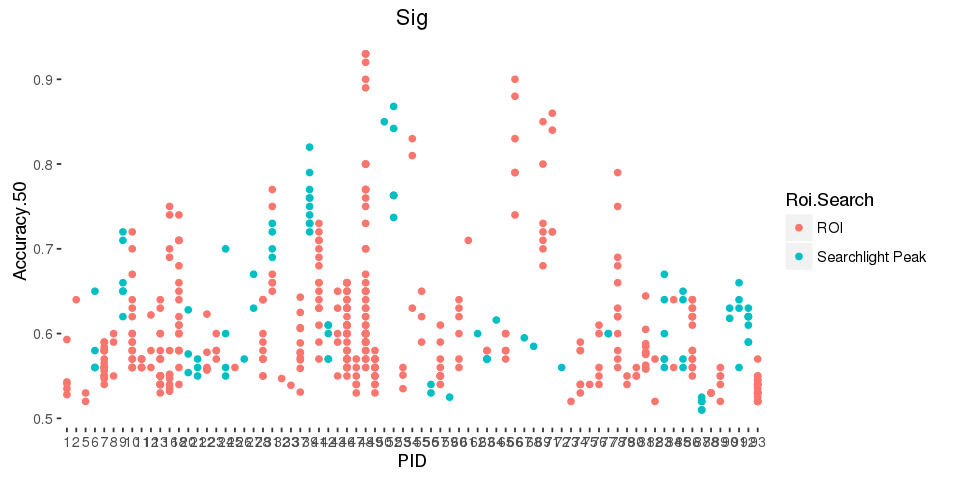

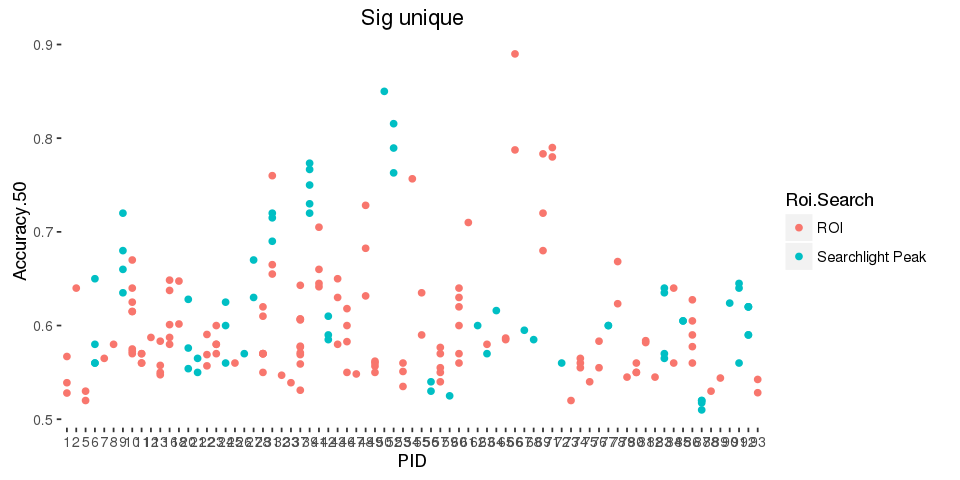

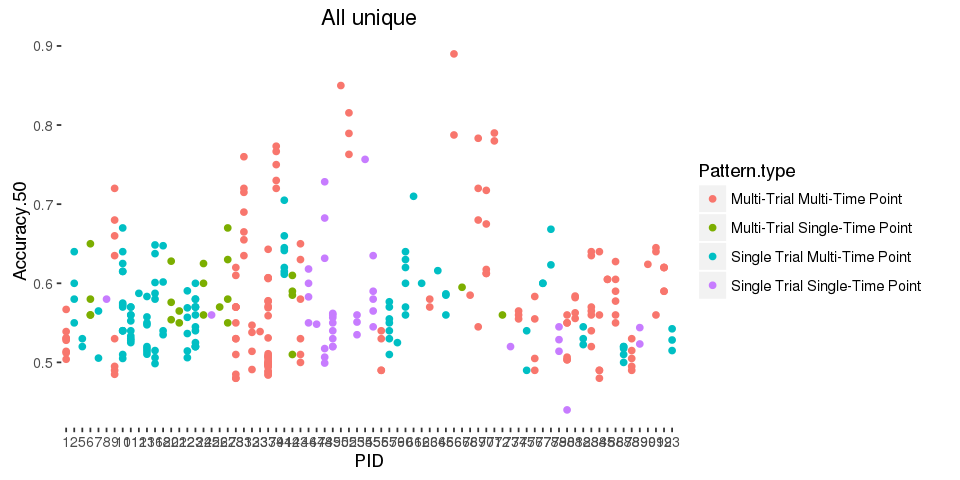

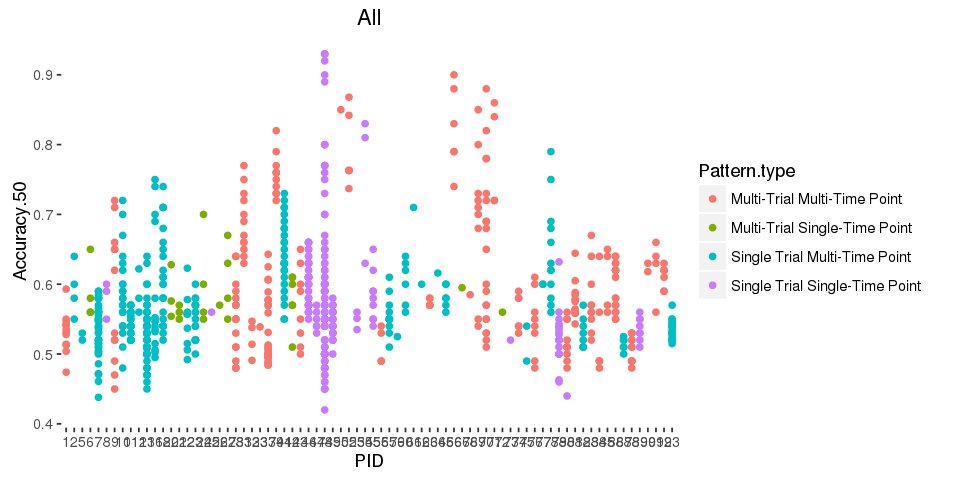

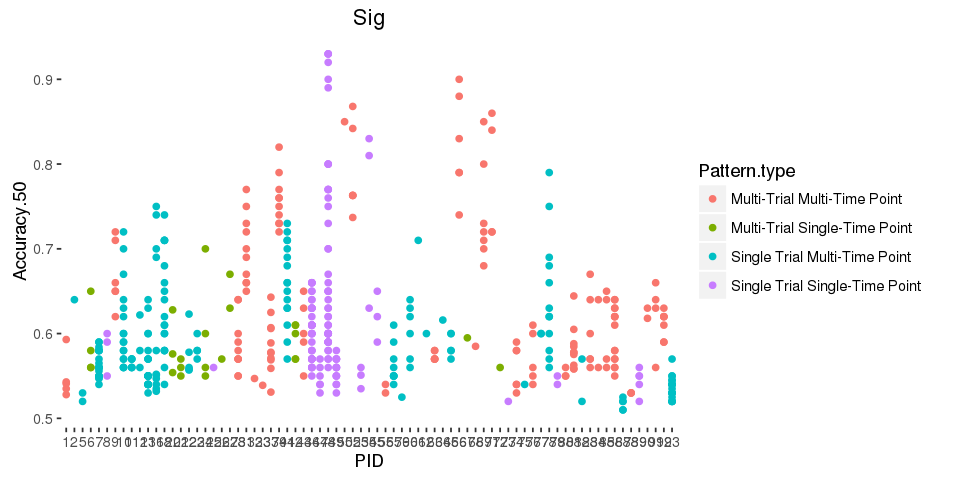

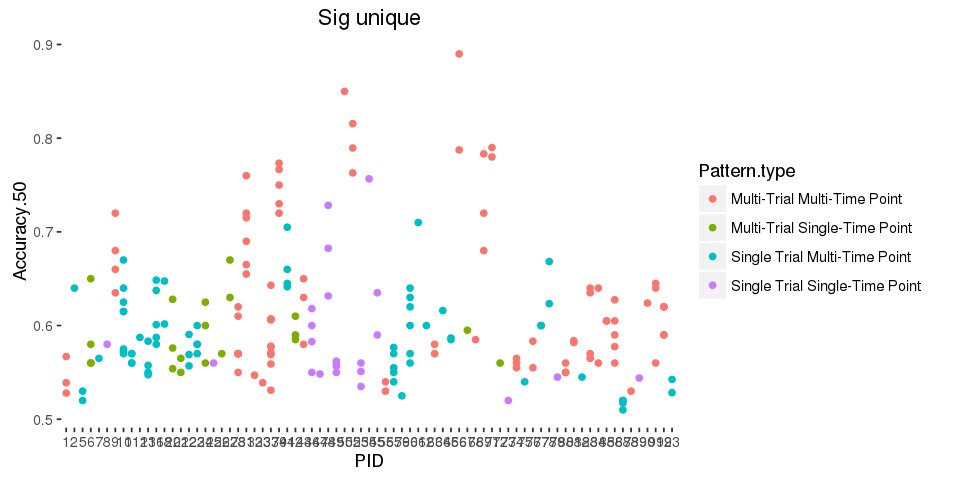

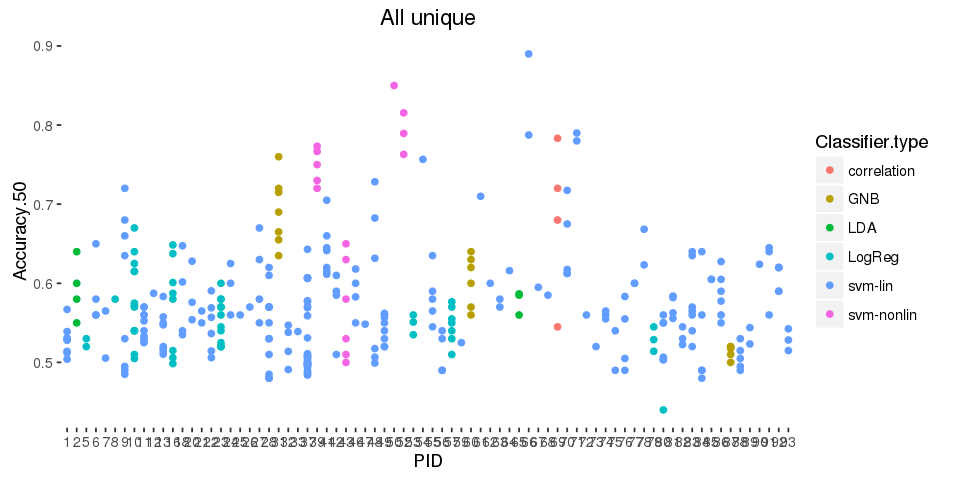

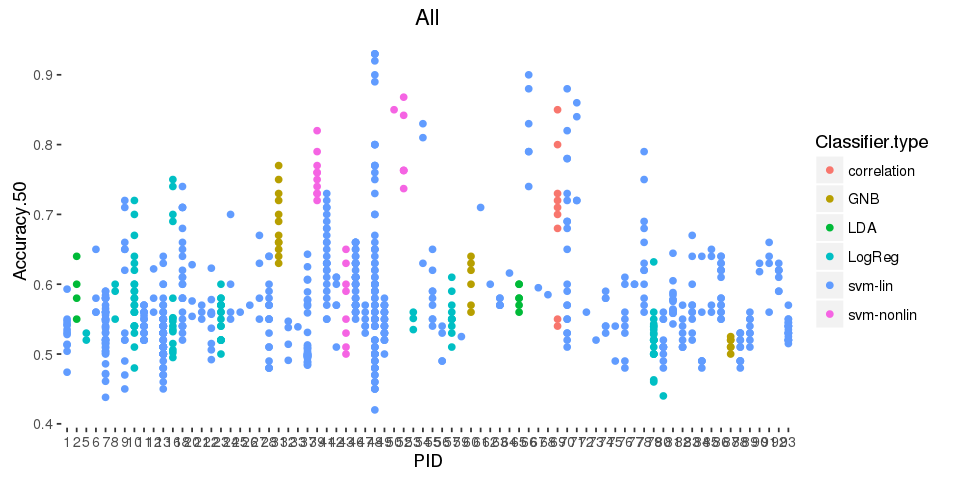

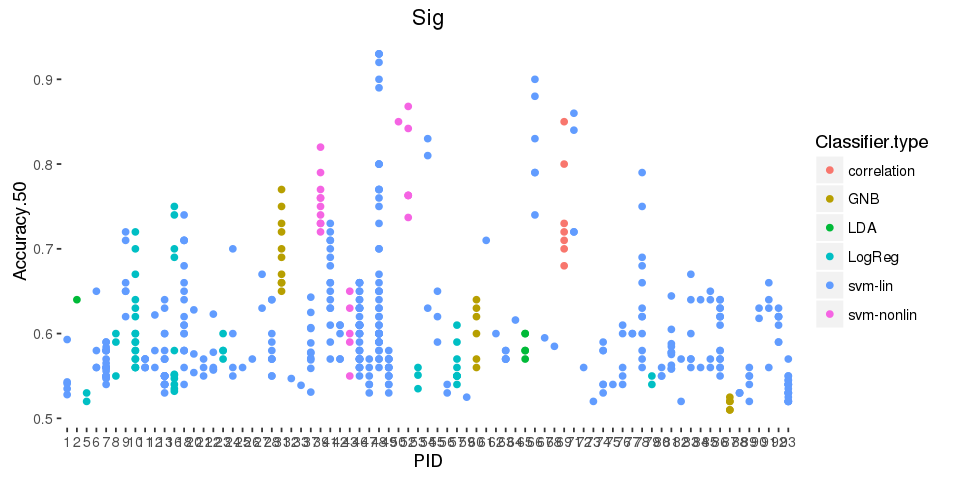

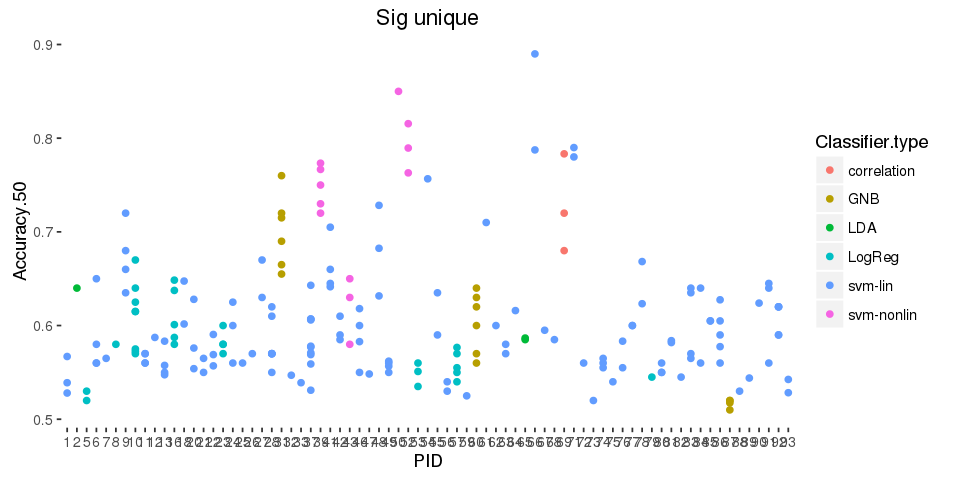

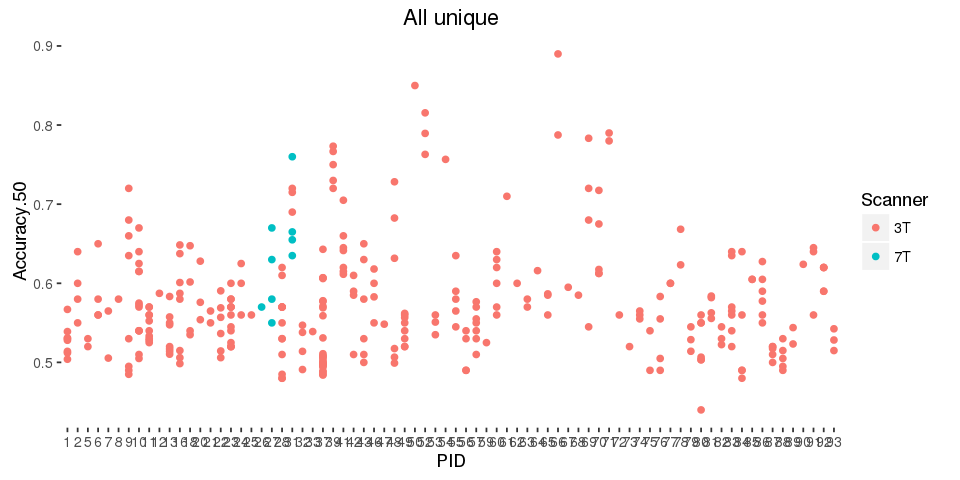

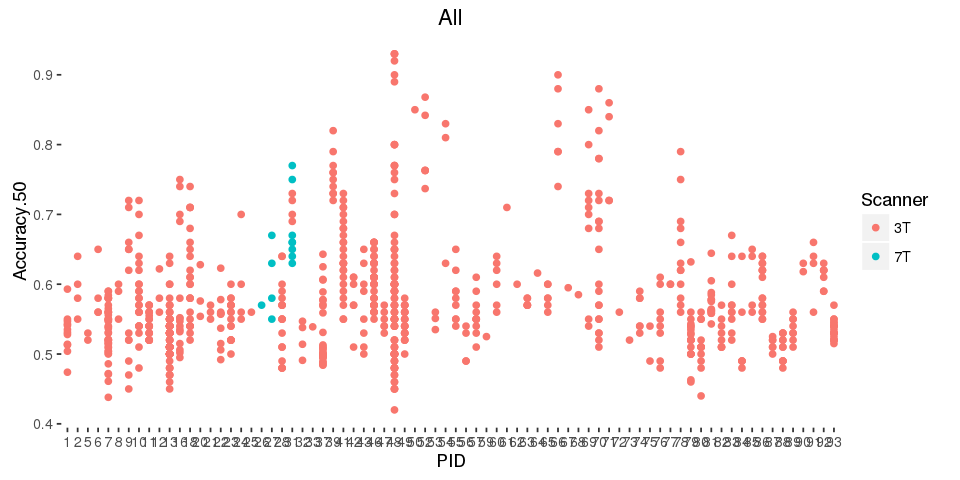

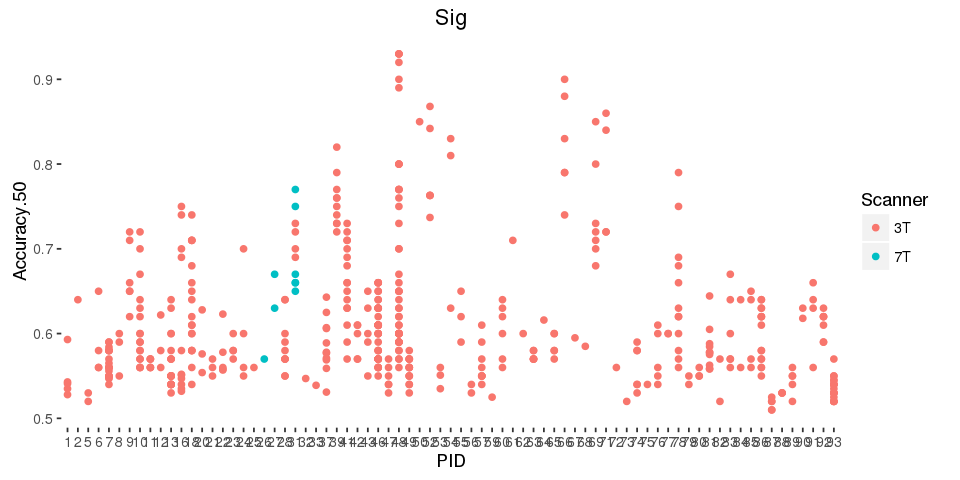

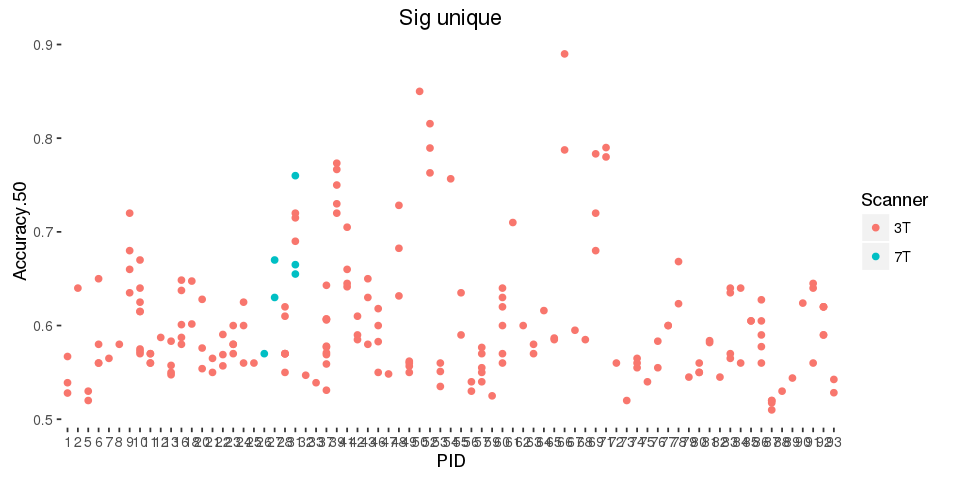

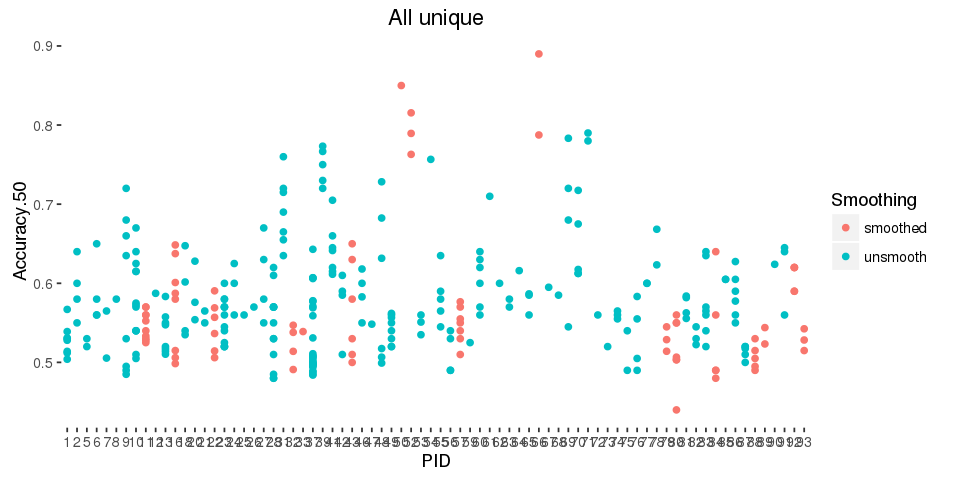

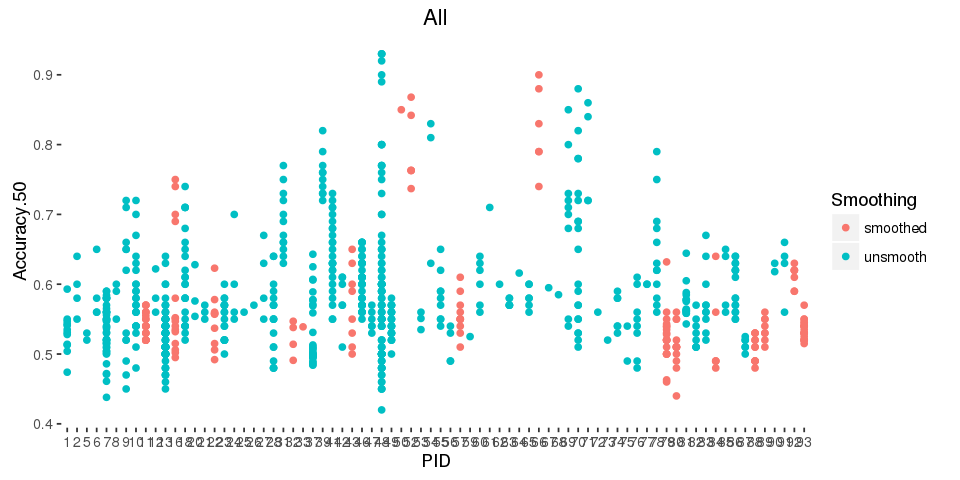

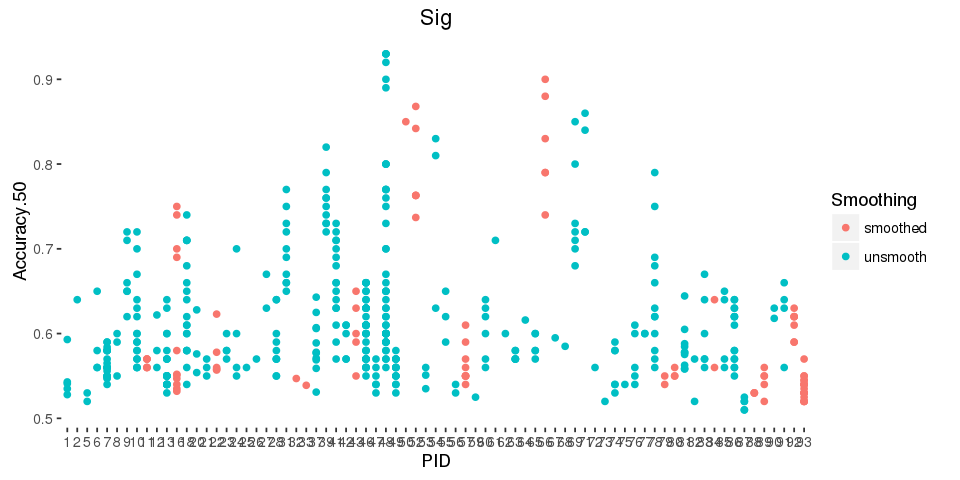

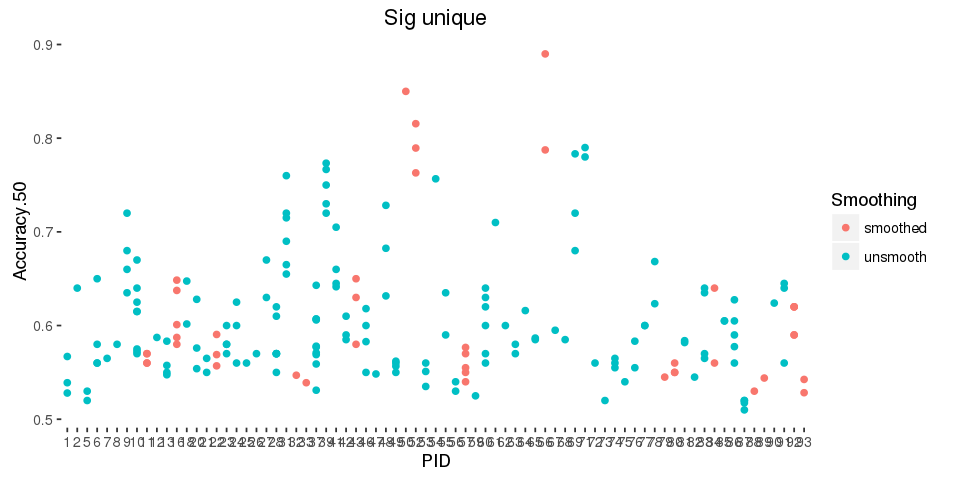

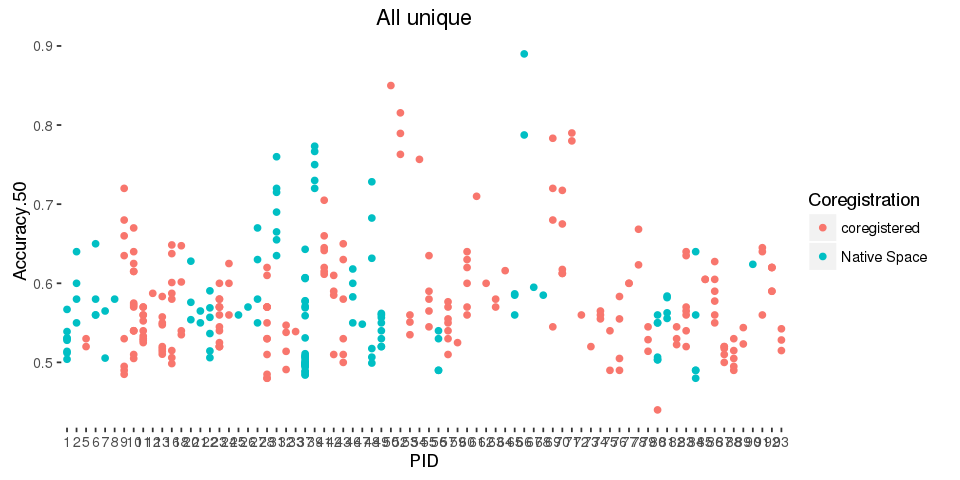

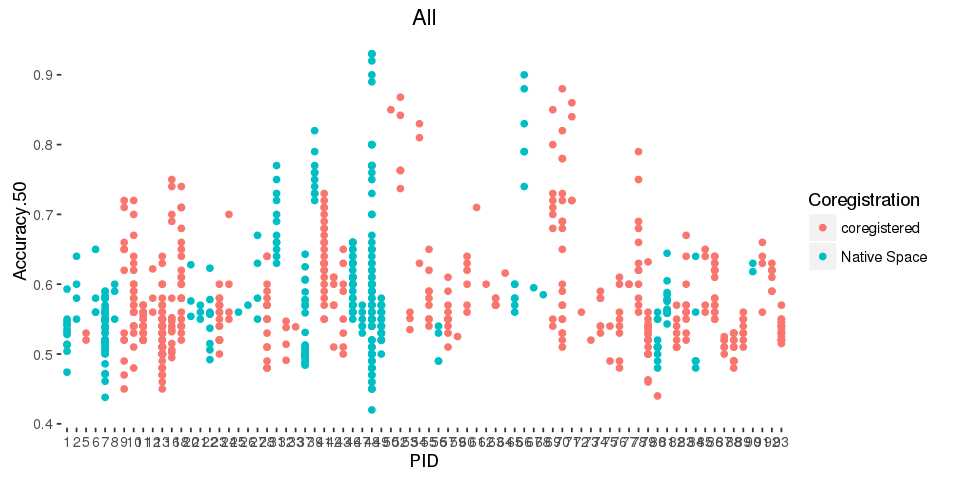

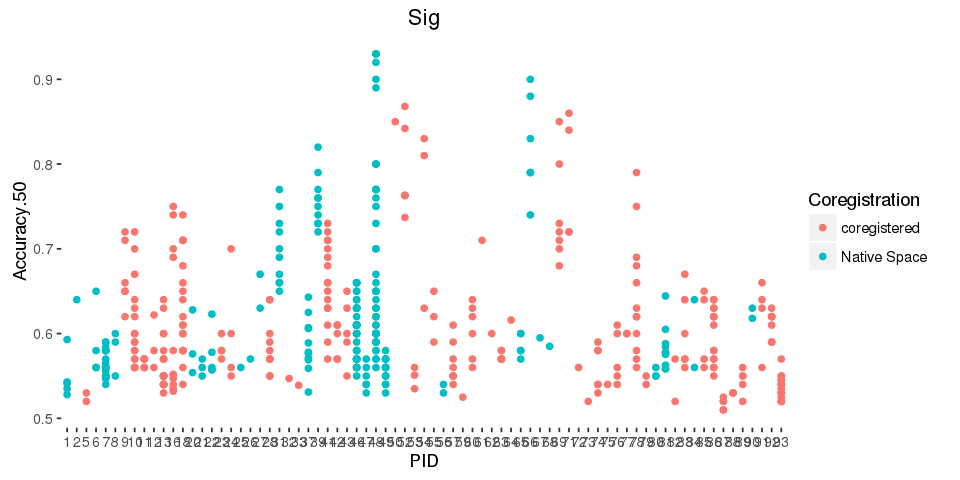

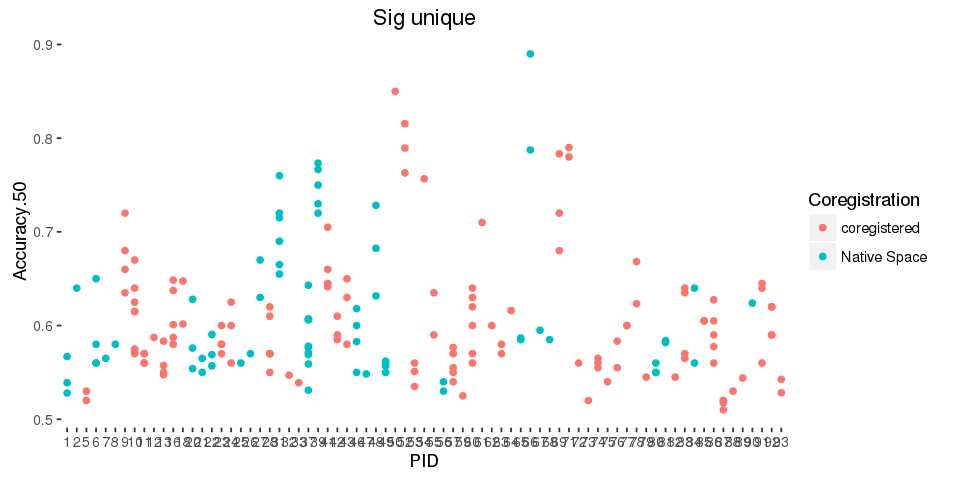

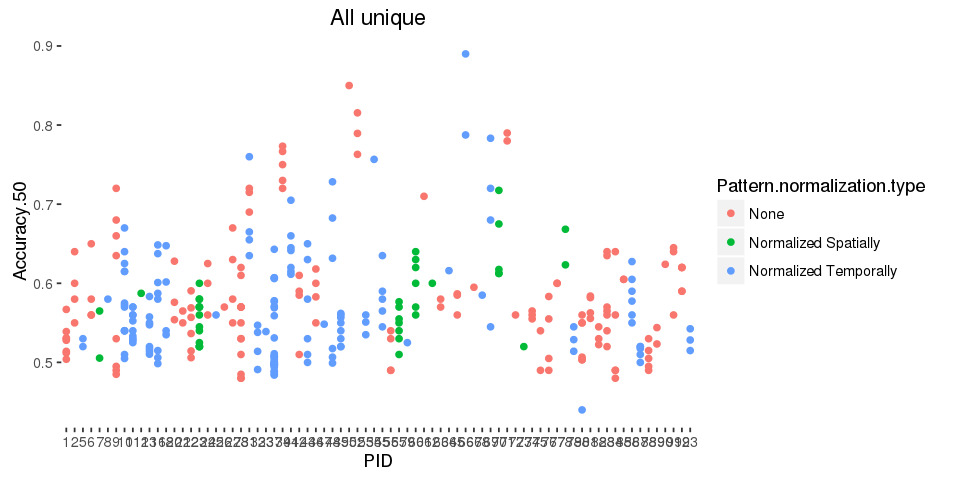

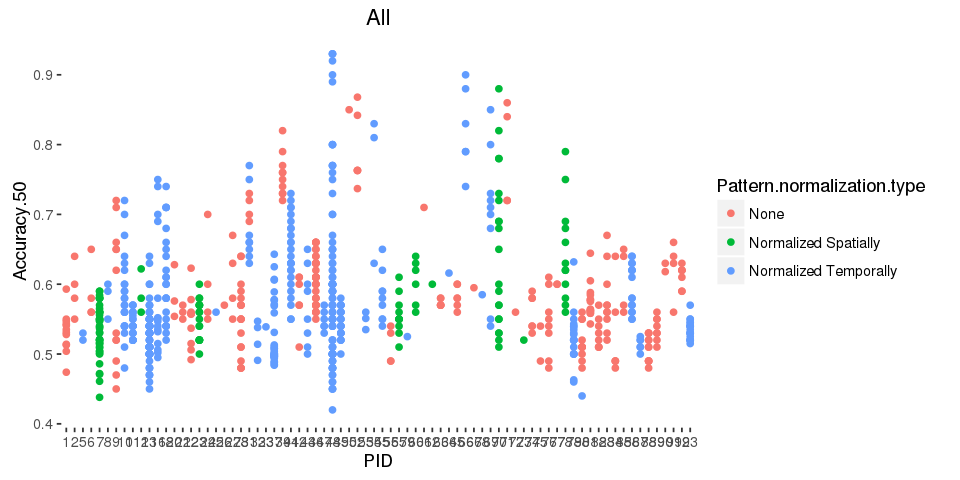

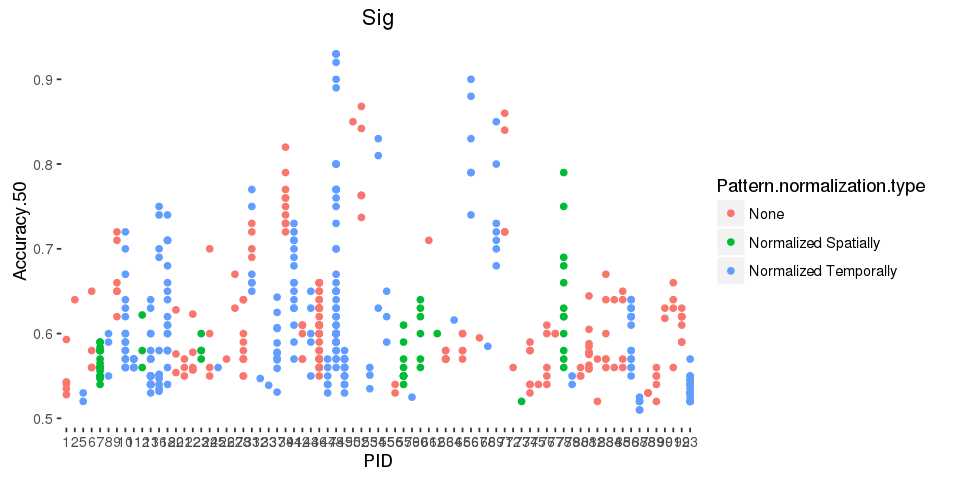

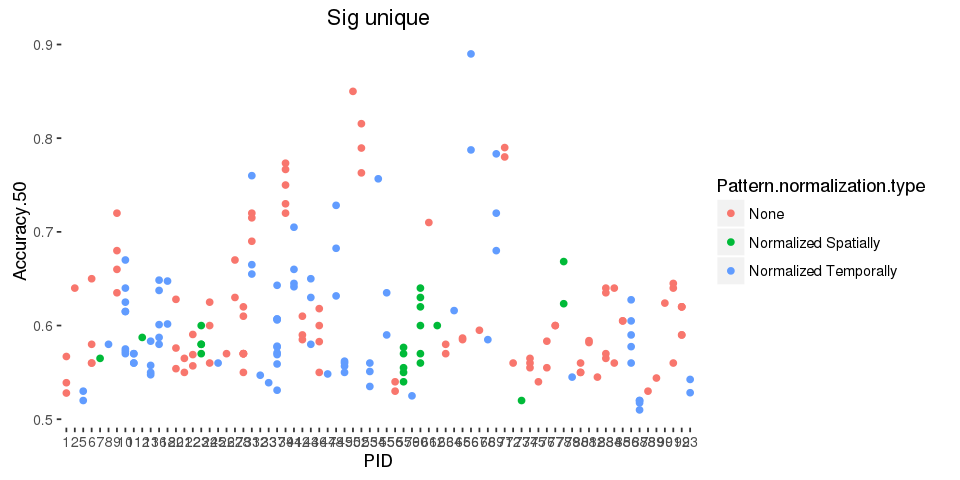

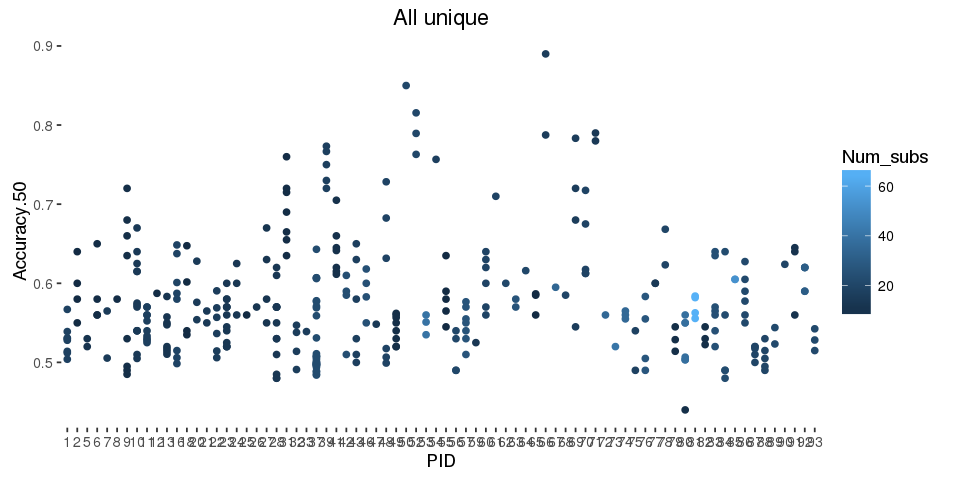

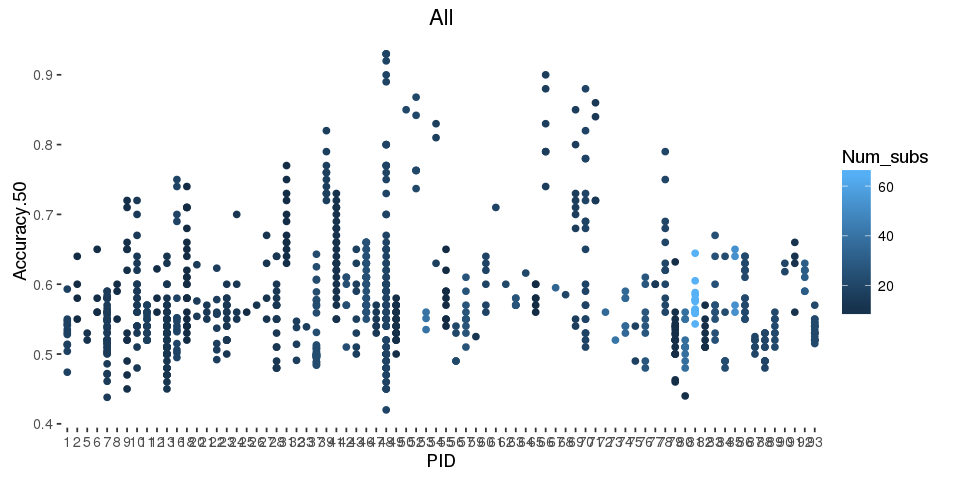

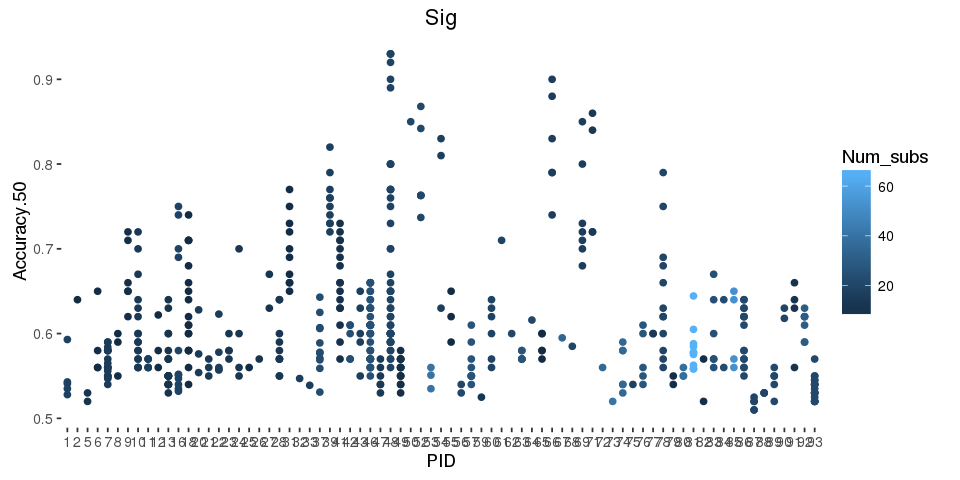

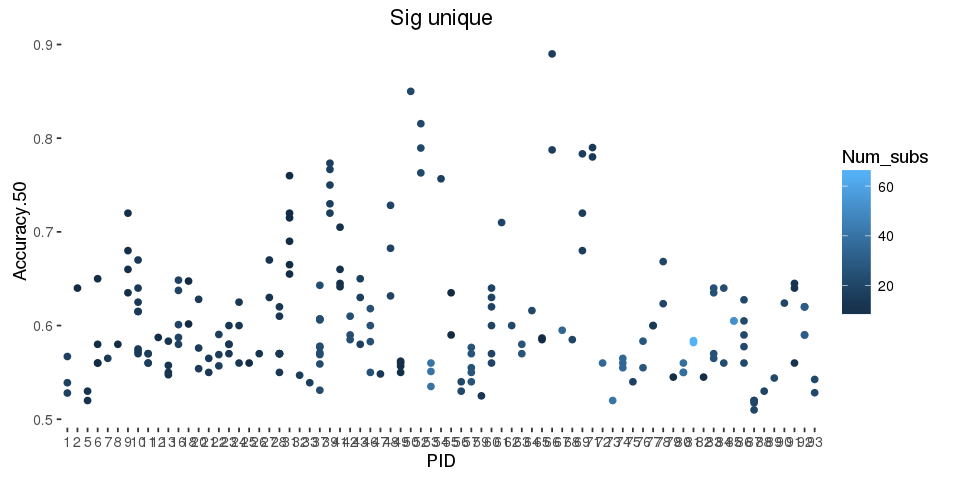

In [5]:
for (factor in factors){
    options(repr.plot.width=8, repr.plot.height=4)
    p1<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color=factor), data = data_50_sig_unique) +geom_point()+ggtitle('Sig unique')+theme(panel.background=element_blank())
    p2<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color=factor), data = data_50_sig) +geom_point()+ggtitle('Sig')+theme(panel.background=element_blank())
    p3<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color=factor), data = data_50) +geom_point()+ggtitle('All')+theme(panel.background=element_blank())
    p4<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color=factor), data = data_50_unique) +geom_point()+ggtitle('All unique')+theme(panel.background=element_blank())
    print(p4)
    print(p3)
    print(p2)
    print(p1)
    #+theme(panel.background=element_blank())

    #options(repr.plot.width=8, repr.plot.height=4)
    #ggplot(aes(y = Accuracy.50, x = PID,color=Info.type), data = data_50_unique) +geom_point()+ggtitle('All')
    
}


In [238]:
factors

[1] "Info.type"                  "Significance"              
 [3] "Roi.Search"                 "Pattern.type"              
 [5] "Classifier.type"            "Scanner"                   
 [7] "Smoothing"                  "Coregistration"            
 [9] "Pattern.normalization.type" "Num_subs"

In [8]:
options(repr.plot.width=10, repr.plot.height=12)
p1<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Info.type'), data = data_50_sig_unique) +ggtitle('Info Type')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank() ,axis.text.x=element_blank())
p2<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Roi.Search'), data = data_50_sig_unique) +ggtitle('Roi or Search')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())
p3<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Pattern.type'), data = data_50_sig_unique) +ggtitle('Temporal Averaging')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())
p4<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Classifier.type'), data = data_50_sig_unique) +ggtitle('Classifier')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())

p5<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Scanner'), data = data_50_sig_unique)+ggtitle('Scanner') +geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())
p6<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Coregistration'), data = data_50_sig_unique)+ggtitle('Coregistration') +geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())
p7<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Pattern.normalization.type'), data = data_50_sig_unique) +ggtitle('Response Normalization')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())

p8<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Num_subs'), data = data_50_sig_unique) +ggtitle('Num_subs')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())



lay <- rbind(c(1,2),
             c(3,4),
            c(5,6),
            c(7,8))

jpeg('feature_scatters.jpg',width=12,height=10,units="in",res=800)
g<-grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,layout_matrix = lay)
g
dev.off()
g

TableGrob (4 x 2) "arrange": 8 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]
6 6 (3-3,2-2) arrange gtable[layout]
7 7 (4-4,1-1) arrange gtable[layout]
8 8 (4-4,2-2) arrange gtable[layout]

pdf 
  2

TableGrob (4 x 2) "arrange": 8 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]
6 6 (3-3,2-2) arrange gtable[layout]
7 7 (4-4,1-1) arrange gtable[layout]
8 8 (4-4,2-2) arrange gtable[layout]

### Region Plots

In [24]:
plot_list <- list()
i<-1
for (pid in unique(data_50_sig_unique$PID)){
    

    # make two arrays
    # accuracy per study
    # associated region per study
    
    # all duplicates are in here (e.g. accuracy assigned to 2 regions)
    d<-data_50_sig_unique[data_50_sig_unique[,'PID']==pid,] # note which region dataset this is
    accuracy = c()
    regions = c()
    rownamess=c()
    for (region in R3names){  # note region name here 
        acc = d[d[,region]==1,'Accuracy.50']
        accuracy = append(accuracy,acc)
        rownamess = append(rownamess,rownames(d[d[,region]==1,]))
        regions = append(regions,rep(region,length(acc)))
    }
    
    # data frame 
    # accuracy , region, rownames
    #  ...,     ...,   ... 
   df = data.frame(accuracy,regions,rownamess)

    # plot 
    p<-ggplot(aes(y = accuracy, x = regions,label=rownamess), data = df) +geom_text()+ggtitle(pid)
    p<-p+ theme(axis.text.x = element_text(angle = 90, hjust = 1))
    plot_list[[i]] = p
    i<-i+1
    
}

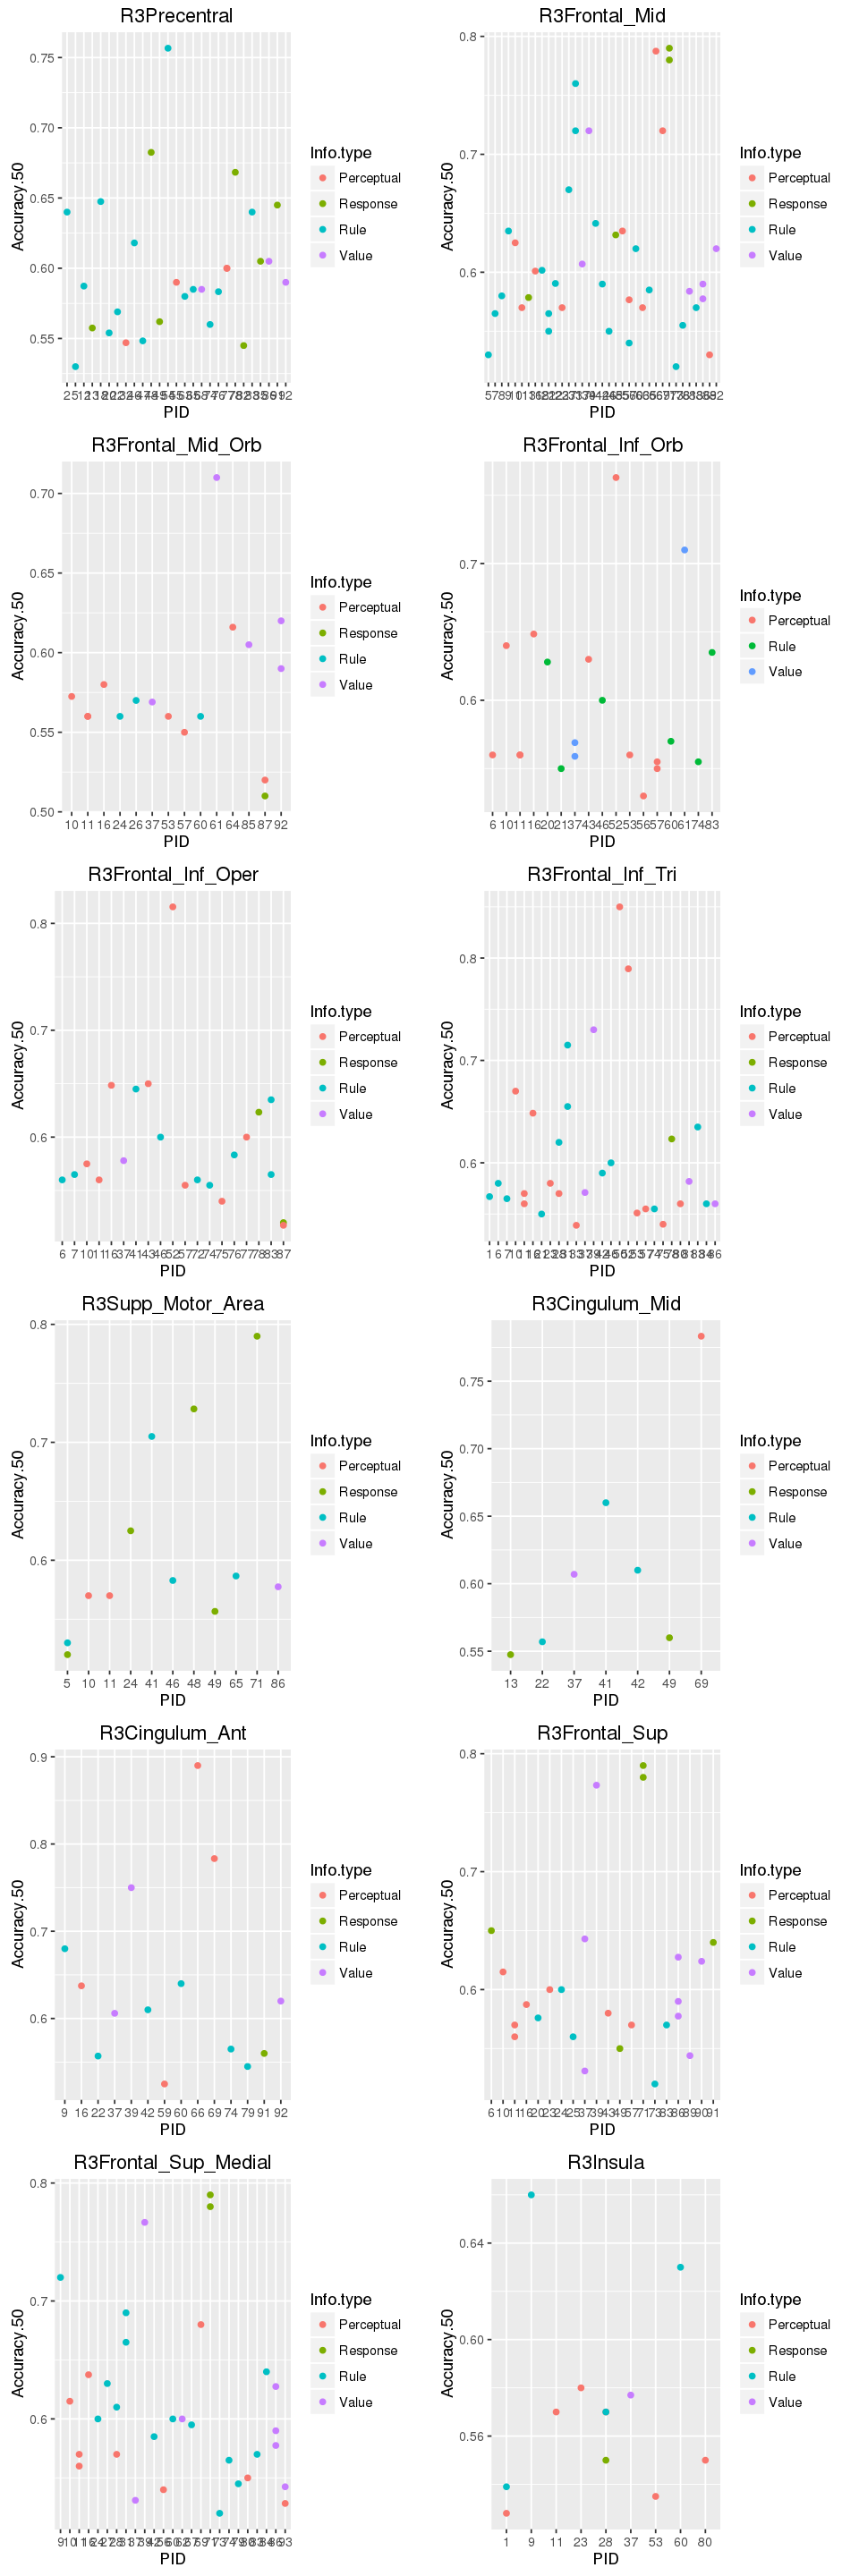

In [26]:
plot_list <- list()
i<-1
options(repr.plot.width=8, repr.plot.height=24)
for (region in R3names){ #
    d<-data_50_sig_unique[data_50_sig_unique[,region]==1,]
    p<-ggplot(aes(y = Accuracy.50, x = PID,color=Info.type), data = d) +geom_point()+ggtitle(region)
    #p<-ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()+ggtitle(region)
    plot_list[[i]] = p
    i<-i+1
    
}

do.call(grid.arrange,c(plot_list, ncol=2))
#grid.arrange(plot_list,ncol=3)

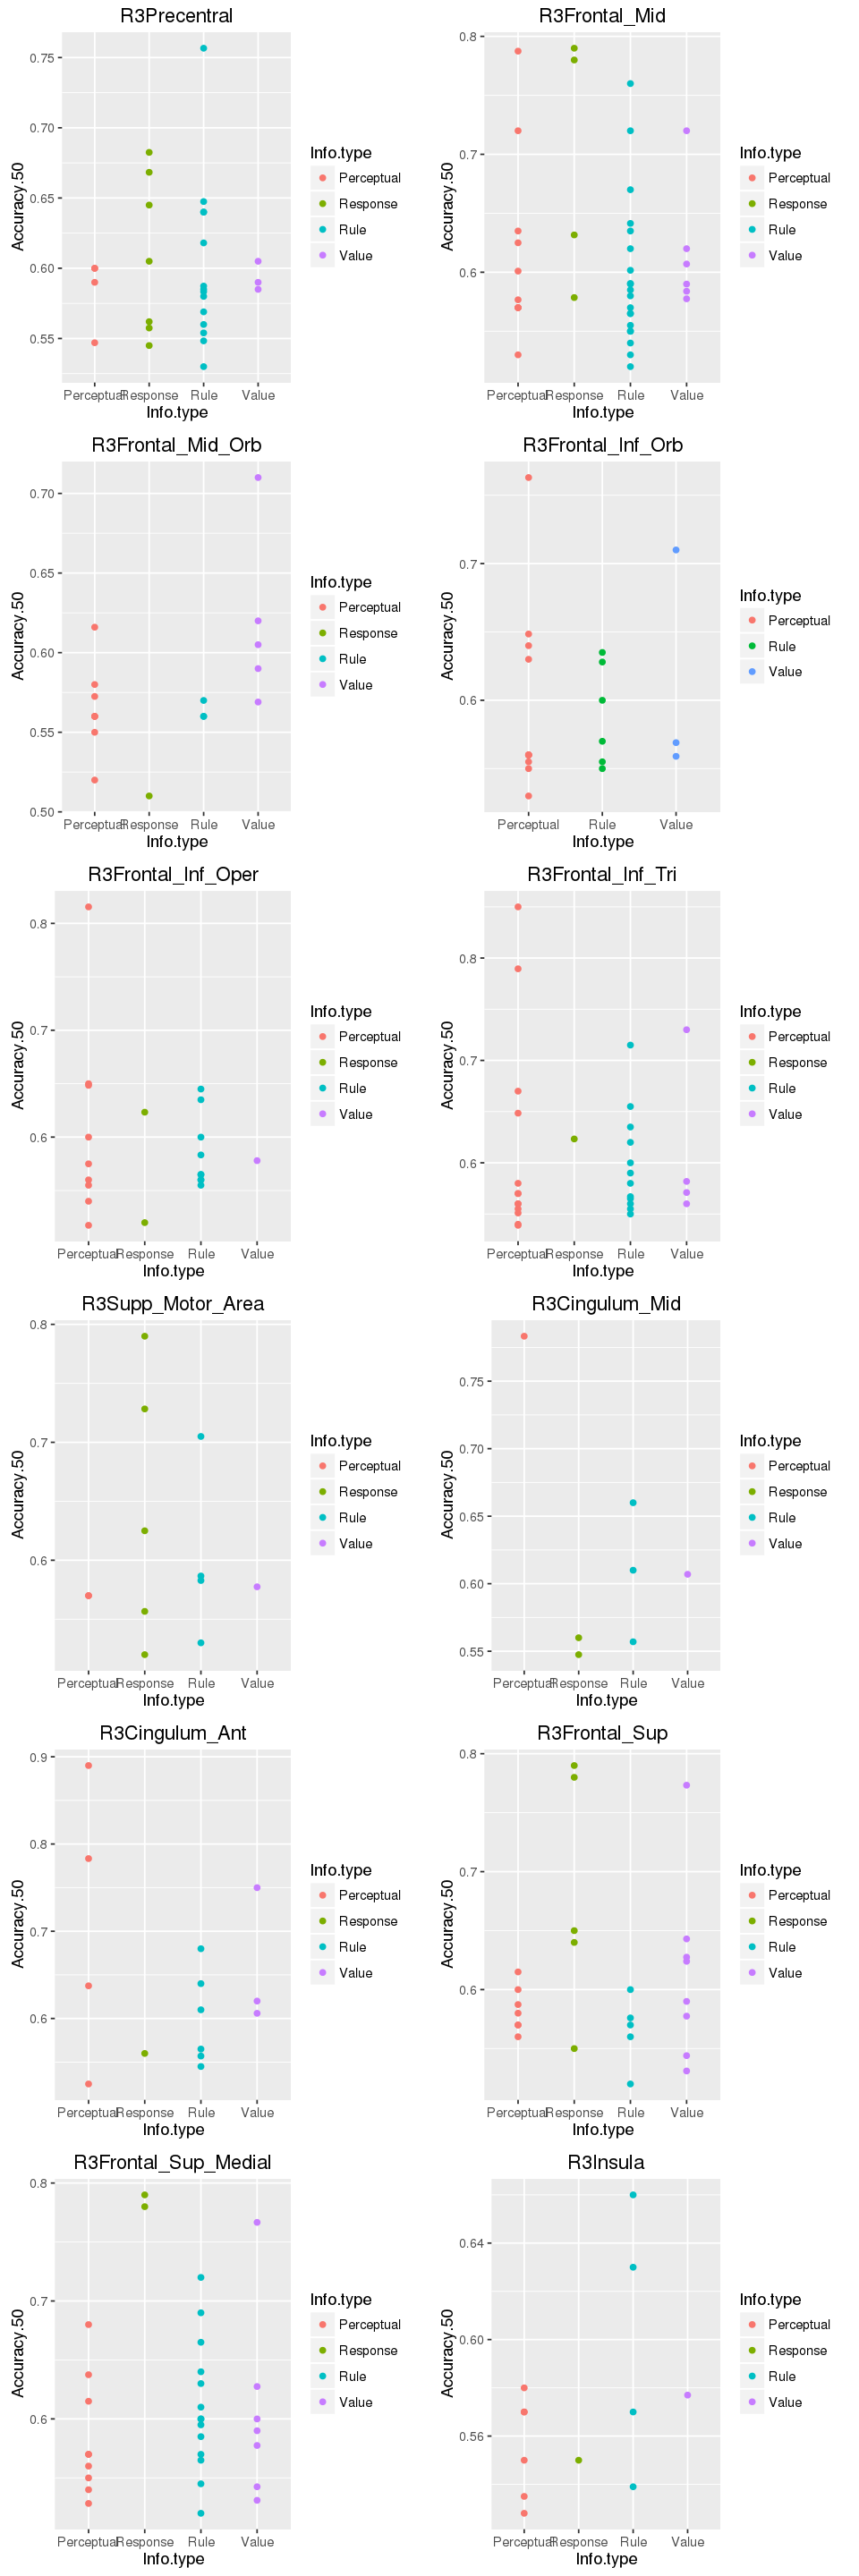

In [27]:
plot_list <- list()
i<-1
options(repr.plot.width=8, repr.plot.height=24)
for (region in R3names){ #
    d<-data_50_sig_unique[data_50_sig_unique[,region]==1,]
    p<-ggplot(aes(y = Accuracy.50, text = PID,x=Info.type,color=Info.type), data = d) +geom_point()+ggtitle(region)#+geom_boxplot()
    #p<-ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()+ggtitle(region)
    plot_list[[i]] = p
    i<-i+1
    
}

do.call(grid.arrange,c(plot_list, ncol=2))
#grid.arrange(plot_list,ncol=3)

In [ ]:
#ggplot(aes(y = Accuracy.50, x=Info.type,color=Info.type), data = d) +geom_point()+ggtitle(region)+geom_boxplot()+facet_wrap()

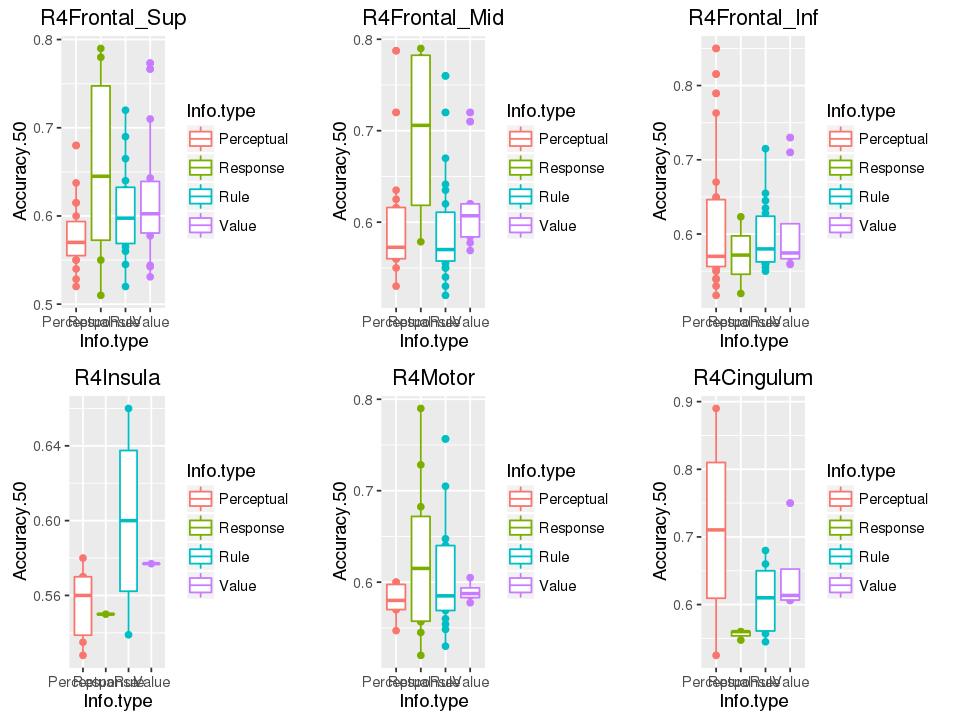

In [28]:
plot_list <- list()
i<-1
options(repr.plot.width=8, repr.plot.height=6)
for (region in R4names){ #
    d<-data_50_sig_unique[data_50_sig_unique[,region]==1,]
    p<-ggplot(aes(y = Accuracy.50, x=Info.type,color=Info.type), data = d) +geom_point()+ggtitle(region)+geom_boxplot()
    #p<-ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()+ggtitle(region)
    plot_list[[i]] = p
    i<-i+1
    
}

do.call(grid.arrange,c(plot_list, ncol=3))
#grid.arrange(plot_list,ncol=3)

## Supplemental Figure 

pdf 
  2

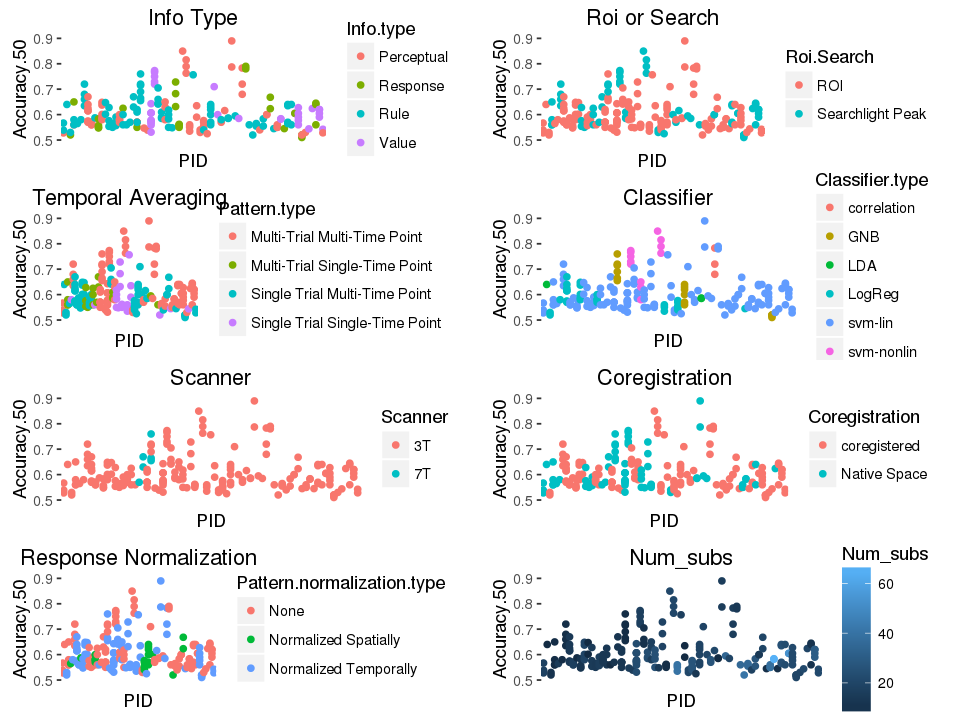

In [20]:

p1<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Info.type'), data = data_50_sig_unique) +ggtitle('Info Type')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank() ,axis.text.x=element_blank())
p2<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Roi.Search'), data = data_50_sig_unique) +ggtitle('Roi or Search')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())
p3<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Pattern.type'), data = data_50_sig_unique) +ggtitle('Temporal Averaging')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())
p4<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Classifier.type'), data = data_50_sig_unique) +ggtitle('Classifier')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())

p5<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Scanner'), data = data_50_sig_unique)+ggtitle('Scanner') +geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())
p6<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Coregistration'), data = data_50_sig_unique)+ggtitle('Coregistration') +geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())
p7<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Pattern.normalization.type'), data = data_50_sig_unique) +ggtitle('Response Normalization')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())

p8<-ggplot(aes_string(y='Accuracy.50', x = 'PID',color='Num_subs'), data = data_50_sig_unique) +ggtitle('Num_subs')+geom_point()+theme(panel.background=element_blank(),axis.ticks.x=element_blank(), axis.text.x=element_blank())



lay <- rbind(c(1,2),
             c(3,4),
            c(5,6),
            c(7,8))

#lay <- rbind(c(1),
#             c(2),
#            c(3),
#            c(4),
#            c(5),
#            c(6),
#            c(7),
#            c(8))

jpeg('feature_scatters_2_and_2.jpg',width=8,height=6,units="in",res=1000)
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,layout_matrix = lay)
dev.off()
options(repr.plot.width=8, repr.plot.height=6)
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,layout_matrix = lay)